In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt


os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [3]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

In [4]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [7]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 7s 9ms/step - loss: 0.2782 - accuracy: 0.9187 - val_loss: 0.1434 - val_accuracy: 0.9567
Epoch 2/5
657/657 [==============================] - 6s 9ms/step - loss: 0.1061 - accuracy: 0.9676 - val_loss: 0.1138 - val_accuracy: 0.9660
Epoch 3/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0706 - accuracy: 0.9782 - val_loss: 0.1084 - val_accuracy: 0.9692
Epoch 4/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.1000 - val_accuracy: 0.9703
Epoch 5/5
657/657 [==============================] - 5s 8ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.1060 - val_accuracy: 0.9693


In [8]:
k=h

In [9]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)


Epoch 1/5
657/657 [==============================] - 8s 12ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.1157 - val_accuracy: 0.9716
Epoch 2/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.1140 - val_accuracy: 0.9746
Epoch 3/5
657/657 [==============================] - 7s 10ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.1124 - val_accuracy: 0.9754
Epoch 4/5
657/657 [==============================] - 6s 8ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.1084 - val_accuracy: 0.9778
Epoch 5/5
657/657 [==============================] - 6s 10ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.1311 - val_accuracy: 0.9756


In [11]:
k1=h


In [12]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [13]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 8s 10ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.1414 - val_accuracy: 0.9752
Epoch 2/5
657/657 [==============================] - 5s 8ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.1495 - val_accuracy: 0.9766
Epoch 3/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.1329 - val_accuracy: 0.9778
Epoch 4/5
657/657 [==============================] - 5s 8ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.1317 - val_accuracy: 0.9777
Epoch 5/5
657/657 [==============================] - 7s 10ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1502 - val_accuracy: 0.9778


In [14]:
k2=h

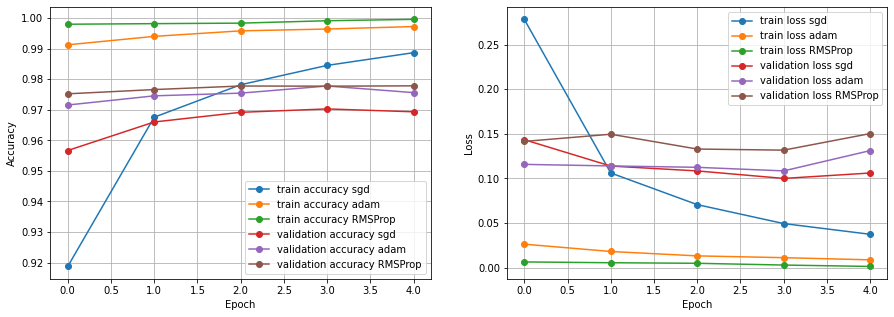

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(k.history['accuracy'], 'o-', label='train accuracy sgd')
plt.plot(k1.history['accuracy'], 'o-', label='train accuracy adam')
plt.plot(k2.history['accuracy'], 'o-', label='train accuracy RMSProp')
plt.plot(k.history['val_accuracy'], 'o-', label = 'validation accuracy sgd')
plt.plot(k1.history['val_accuracy'], 'o-', label = 'validation accuracy adam')
plt.plot(k2.history['val_accuracy'], 'o-', label = 'validation accuracy RMSProp')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(k.history['loss'], 'o-', label='train loss sgd')
plt.plot(k1.history['loss'], 'o-', label='train loss adam')
plt.plot(k2.history['loss'], 'o-', label='train loss RMSProp')
plt.plot(k.history['val_loss'], 'o-', label='validation loss sgd')
plt.plot(k1.history['val_loss'], 'o-', label='validation loss adam')
plt.plot(k2.history['val_loss'], 'o-', label='validation loss RMSProp')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1171 - accuracy: 0.9798

Test accuracy: 0.9797999858856201
